In [1]:
#%matplotlib inline
%matplotlib widget

In [2]:
isdark = True

In [3]:
# initialization
import itertools
from rayoptics.util.misc_math import euler2opt
import transforms3d as t3d

# use standard rayoptics environment
from rayoptics.environment import *

from rayoptics.elem.elements import Element, Mirror
from rayoptics.elem import parttree

# util functions
from rayoptics.util.misc_math import normalize

# Create a new model

In [4]:
opm = OpticalModel()
sm = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model
em = opm.ele_model
pt = opm.part_tree

## Define first order aperture and field for system

In [5]:
osp.pupil = PupilSpec(osp, key=['image', 'f/#'], value=3.5)
osp.field_of_view = FieldSpec(osp, key=['image', 'height'], flds=[0., .7071*3.5, 3.5])
osp.spectral_region = WvlSpec([(486.1327, 0.5), (587.5618, 1.0), (656.2725, 0.5)], ref_wl=1)

## Define interface and gap data for the sequential model

In [6]:
opm.system_spec.title = 'Cell Phone Lens - U.S. Patent 7,535,658'
opm.system_spec.dimensions = 'MM'
opm.radius_mode = True

sm.gaps[0].thi=1e10

sm.add_surface([0., 0.])
sm.set_stop()
sm.add_surface([1.962, 1.19, 1.471, 76.6])
sm.add_surface([33.398, .93])
sm.add_surface([-2.182, .75, 1.603, 27.5])
sm.add_surface([-6.367, 0.1])
sm.add_surface([5.694, .89, 1.510, 56.2])
sm.add_surface([9.192, .16])
sm.add_surface([1.674, .85, 1.510, 56.2])
sm.add_surface([1.509, .70])
sm.add_surface([0., .40, 1.516, 64.1])
sm.add_surface([0., .64])

asp1 = RadialPolynomial(r=1.962, ec=2.153,
                        coefs=[0., 0., -1.895e-2, 2.426e-2, -5.123e-2, 8.371e-4, 7.850e-3, 4.091e-3, -7.732e-3, -4.265e-3])
asp2 = RadialPolynomial(r=33.398, ec=40.18,
                        coefs=[0., 0., -4.966e-3, -1.434e-2, -6.139e-3, -9.284e-5, 6.438e-3, -5.72e-3, -2.385e-2, 1.108e-2])
asp3 = RadialPolynomial(r=-2.182, ec=2.105,
                        coefs=[0., 0., -4.388e-2, -2.555e-2, 5.16e-2, -4.307e-2, -2.831e-2, 3.162e-2, 4.630e-2, -4.877e-2])
asp4 = RadialPolynomial(r=-6.367, ec=3.382,
                        coefs=[0., 0., -1.131e-1, -7.863e-2, 1.094e-1, 6.228e-3, -2.216e-2, -5.89e-3, 4.123e-3, 1.041e-3])
asp5 = RadialPolynomial(r=5.694, ec=-221.1,
                        coefs=[0., 0., -7.876e-2, 7.02e-2, 1.575e-3, -9.958e-3, -7.322e-3, 6.914e-4, 2.54e-3, -7.65e-4])
asp6 = RadialPolynomial(r=9.192, ec=0.9331,
                        coefs=[0., 0., 9.694e-3, -2.516e-3, -3.606e-3, -2.497e-4, -6.84e-4, -1.414e-4, 2.932e-4, -7.284e-5])
asp7 = RadialPolynomial(r=1.674, ec=-7.617,
                        coefs=[0., 0., 7.429e-2, -6.933e-2, -5.811e-3, 2.396e-3, 2.100e-3, -3.119e-4, -5.552e-5, 7.969e-6])
asp8 = RadialPolynomial(r=1.509, ec=-2.707,
                        coefs=[0., 0., 1.767e-3, -4.652e-2, 1.625e-2, -3.522e-3, -7.106e-4, 3.825e-4, 6.271e-5, -2.631e-5])
sm.ifcs[2].profile = asp1
sm.ifcs[3].profile = asp2
sm.ifcs[4].profile = asp3
sm.ifcs[5].profile = asp4
sm.ifcs[6].profile = asp5
sm.ifcs[7].profile = asp6
sm.ifcs[8].profile = asp7
sm.ifcs[9].profile = asp8

In [7]:
for i, ifc in enumerate(sm.ifcs[1:-1], start=1):
    print(f'{i}: ' + ifc.profile.listobj_str())

1: profile: Spherical
c=0.0,   r=0.0

2: profile: RadialPolynomial
c=0.509683995922528,   r=1.9620000000000002   conic cnst=1.153
coefficients: [0.0, 0.0, -0.01895, 0.02426, -0.05123, 0.0008371, 0.00785, 0.004091, -0.007732, -0.004265]

3: profile: RadialPolynomial
c=0.029941912689382594,   r=33.398   conic cnst=39.18
coefficients: [0.0, 0.0, -0.004966, -0.01434, -0.006139, -9.284e-05, 0.006438, -0.00572, -0.02385, 0.01108]

4: profile: RadialPolynomial
c=-0.4582951420714941,   r=-2.182   conic cnst=1.105
coefficients: [0.0, 0.0, -0.04388, -0.02555, 0.0516, -0.04307, -0.02831, 0.03162, 0.0463, -0.04877]

5: profile: RadialPolynomial
c=-0.1570598397989634,   r=-6.367   conic cnst=2.382
coefficients: [0.0, 0.0, -0.1131, -0.07863, 0.1094, 0.006228, -0.02216, -0.00589, 0.004123, 0.001041]

6: profile: RadialPolynomial
c=0.17562346329469616,   r=5.694   conic cnst=-222.1
coefficients: [0.0, 0.0, -0.07876, 0.0702, 0.001575, -0.009958, -0.007322, 0.0006914, 0.00254, -0.000765]

7: profile: Ra

## Update the model

In [8]:
opm.update_model()

## List the sequential model and the first order properties

In [9]:
sm.list_model()

              r            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1  6.3006e+09
 Stop:     0.000000      0.00000       air             1     0.79358
    2:     1.962000      1.19000   471.766             1     0.93800
    3:    33.398000     0.930000       air             1      1.0837
    4:    -2.182000     0.750000   603.275             1      1.1338
    5:    -6.367000     0.100000       air             1      1.5390
    6:     5.694000     0.890000   510.562             1      1.8254
    7:     9.192000     0.160000       air             1      2.3978
    8:     1.674000     0.850000   510.562             1      2.4820
    9:     1.509000     0.700000       air             1      2.9297
   10:     0.000000     0.400000   516.641             1      3.3067
   11:     0.000000     0.640000       air             1      3.4058
  Img:     0.000000      0.00000                       1      3.6910


In [10]:
pm.first_order_data()

efl               5.555
ffl              -7.531
pp1              -1.976
bfl              0.5678
ppk               4.987
f/#                 3.5
m            -5.555e-10
red            -1.8e+09
obj_dist          1e+10
obj_ang           32.21
enp_dist             -0
enp_radius       0.7936
na obj        7.936e-11
n obj                 1
img_dist         0.5678
img_ht              3.5
exp_dist         -3.602
exp_radius       0.5854
na img          -0.1414
n img                 1
optical invariant          0.5


In [11]:
fo.list_parax_trace(opm)

stop surface: 1
           y           u           n*i         ybar         ubar        n*ibar
 0            0  7.93581e-11  7.93581e-11 -6.30055e+09     0.630055     0.630055
 1     0.793581  7.93581e-11  7.93581e-11            0     0.630055     0.630055
 2     0.793581    -0.129509     0.404476            0     0.428317     0.630055
 3     0.639465     -0.18149    -0.162343     0.509698     0.637243     0.652504
 4      0.47068   -0.0320753      -0.3972      1.10233      0.58757     0.132049
 5     0.446623    -0.093715    -0.163862      1.54301     0.795741     0.553396
 6     0.437252   -0.0879992   -0.0169233      1.62259     0.430735      1.08071
 7     0.358933    -0.112964   -0.0739158      2.00594     0.761705     0.979932
 8     0.340858    -0.143583    0.0906549      2.12781    0.0751303       2.0328
 9     0.218813    -0.142857   0.00214819      2.19167     0.854171      2.30657
10     0.118813   -0.0942329    -0.142857      2.78959     0.563438     0.854171
11    0.081119

## Create elements from the sequential model and then set semi-diameters and flats for manufacturing and mounting

In [12]:
parttree.elements_from_sequence(em, sm, pt)

In [13]:
elmn = [e for e in opm.ele_model.elements if isinstance(e, Element) or isinstance(e, Mirror)]

In [14]:
elmn[0].sd = 1.25
elmn[1].sd = 1.75
elmn[1].flat1 = 1.25
elmn[1].flat2 = 1.645
elmn[1].do_flat1 = 'always'
elmn[1].do_flat2 = 'always'
elmn[2].sd = 2.5
elmn[2].flat1 = 2.1
elmn[2].do_flat1 = 'always'
elmn[2].do_flat2 = 'always'
elmn[3].sd = 3.0
elmn[3].flat1 = 2.6
elmn[3].do_flat1 = 'always'
elmn[3].do_flat2 = 'always'
elmn[4].sd = 3.5

## Draw a lens layout to verify the model

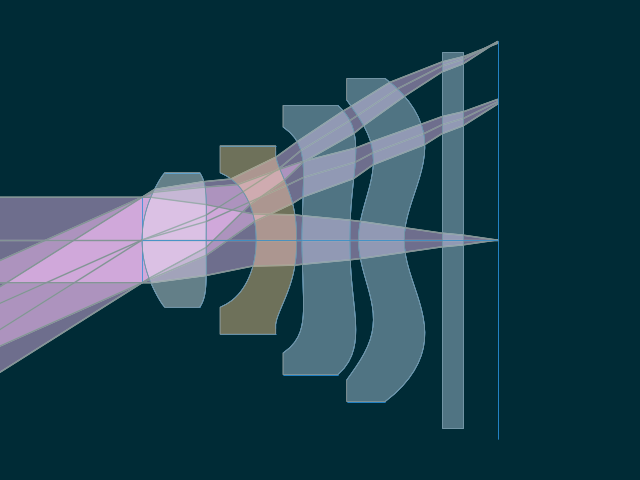

In [15]:
live_layout = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                         do_draw_rays=True, do_paraxial_layout=False,
                         offset_factor=0.1, is_dark=isdark).plot()

In [16]:
sm.rndx

[[1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0],
 [1.47466823288944, 1.471, 1.469170103837133],
 [1.0, 1.0, 1.0],
 [1.6192290090504393, 1.603, 1.5963558189310294],
 [1.0, 1.0, 1.0],
 [1.5159974655636532, 1.51, 1.5072773572773235],
 [1.0, 1.0, 1.0],
 [1.5159974655636532, 1.51, 1.5072773572773235],
 [1.0, 1.0, 1.0],
 [1.5211816424167774, 1.516, 1.513590045363769],
 [1.0, 1.0, 1.0]]

## Use Pathlib to find the installation directory and save the model.

In [17]:
root_pth = Path(rayoptics.__file__).resolve().parent

opm.save_model(str(root_pth/"optical/tests/cell_phone_camera"))

## List the element model

In [18]:
em.list_model()

0: Object (DummyInterface): Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1: Stop (DummyInterface): Surface(profile=Spherical(c=0.0), interact_mode='transmit')
2: E1 (Element): Element: RadialPolynomial(c=0.509683995922528, ec=2.153, coefs=[0.0, 0.0, -0.01895, 0.02426, -0.05123, 0.0008371, 0.00785, 0.004091, -0.007732, -0.004265]), RadialPolynomial(c=0.029941912689382594, ec=40.18, coefs=[0.0, 0.0, -0.004966, -0.01434, -0.006139, -9.284e-05, 0.006438, -0.00572, -0.02385, 0.01108]), t=1.1900, sd=1.2500, glass: 471.766
3: E2 (Element): Element: RadialPolynomial(c=-0.4582951420714941, ec=2.105, coefs=[0.0, 0.0, -0.04388, -0.02555, 0.0516, -0.04307, -0.02831, 0.03162, 0.0463, -0.04877]), RadialPolynomial(c=-0.1570598397989634, ec=3.382, coefs=[0.0, 0.0, -0.1131, -0.07863, 0.1094, 0.006228, -0.02216, -0.00589, 0.004123, 0.001041]), t=0.7500, sd=1.7500, glass: 603.275
4: E3 (Element): Element: RadialPolynomial(c=0.17562346329469616, ec=-221.1, coefs=[0.0, 0.0, -0.07876,

## Trace axial marginal ray

In [19]:
pt0 = np.array([0., 1., 0.])
dir0 = np.array([0., 0., 1.])
wvl = sm.central_wavelength()
marg_ray = rt.trace(sm, pt0, dir0, wvl)
list_ray(marg_ray[0])

            X            Y            Z           L            M            N               Len
  0:      0.00000      1.00000            0     0.000000     0.000000     1.000000        1e+10
  1:      0.00000      1.00000            0     0.000000     0.000000     1.000000      0.26119
  2:      0.00000      1.00000      0.26119     0.000000    -0.163284     0.986579      0.93632
  3:      0.00000      0.84711   -0.0050525     0.000000    -0.272278     0.962219      0.86687
  4:      0.00000      0.61108     -0.10094     0.000000    -0.024063     0.999710      0.79796
  5:      0.00000      0.59188    -0.053212     0.000000    -0.171810     0.985130      0.16841
  6:      0.00000      0.56295     0.012694     0.000000    -0.122925     0.992416      0.89598
  7:      0.00000      0.45281      0.01188     0.000000    -0.158261     0.987397       0.2017
  8:      0.00000      0.42089     0.051033     0.000000    -0.178956     0.983857      0.83614
  9:      0.00000      0.27126     0.023

In [20]:
g_tfrms = sm.compute_global_coords(glo=2)
for i, rottrn in enumerate(g_tfrms):
    r, t = rottrn
    print(i, t, *np.rad2deg(euler2opt(t3d.euler.mat2euler(r))))

0 [ 0.e+00  0.e+00 -1.e+10] -0.0 0.0 0.0
1 [0. 0. 0.] -0.0 0.0 0.0
2 [0. 0. 0.] -0.0 0.0 0.0
3 [0.   0.   1.19] -0.0 0.0 0.0
4 [0.   0.   2.12] -0.0 0.0 0.0
5 [0.   0.   2.87] -0.0 0.0 0.0
6 [0.   0.   2.97] -0.0 0.0 0.0
7 [0.   0.   3.86] -0.0 0.0 0.0
8 [0.   0.   4.02] -0.0 0.0 0.0
9 [0.   0.   4.87] -0.0 0.0 0.0
10 [0.   0.   5.57] -0.0 0.0 0.0
11 [0.   0.   5.97] -0.0 0.0 0.0
12 [0.   0.   6.61] -0.0 0.0 0.0


In [21]:
glo=2
seq = itertools.zip_longest(sm.ifcs[glo::-1], sm.gaps[glo-1::-1])

In [22]:
list(seq)

[(Surface(profile=RadialPolynomial(c=0.509683995922528, ec=2.153, coefs=[0.0, 0.0, -0.01895, 0.02426, -0.05123, 0.0008371, 0.00785, 0.004091, -0.007732, -0.004265]), interact_mode='transmit'),
  Gap(t=0.0, medium=Air())),
 (Surface(profile=Spherical(c=0.0), interact_mode='transmit'),
  Gap(t=10000000000.0, medium=Air())),
 (Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy'), None)]

In [23]:
sm.list_model()

              r            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1  6.3006e+09
 Stop:     0.000000      0.00000       air             1     0.79358
    2:     1.962000      1.19000   471.766             1     0.93800
    3:    33.398000     0.930000       air             1      1.0837
    4:    -2.182000     0.750000   603.275             1      1.1338
    5:    -6.367000     0.100000       air             1      1.5390
    6:     5.694000     0.890000   510.562             1      1.8254
    7:     9.192000     0.160000       air             1      2.3978
    8:     1.674000     0.850000   510.562             1      2.4820
    9:     1.509000     0.700000       air             1      2.9297
   10:     0.000000     0.400000   516.641             1      3.3067
   11:     0.000000     0.640000       air             1      3.4058
  Img:     0.000000      0.00000                       1      3.6910


In [24]:
dir0 = normalize(np.array([0.086, 0.173, 0.981]))
pt1 = np.array(-dir0)
sm.gaps[1].thi = dir0[2]
pt1[2] = 0.
dir0, [0.086, 0.173, 0.981], pt1

(array([0.08601351, 0.17302717, 0.98115405]),
 [0.086, 0.173, 0.981],
 array([-0.08601351, -0.17302717,  0.        ]))

## Trace an arbitrary skew ray using the low level trace_raw function.

In [25]:
wvl = sm.central_wavelength()

path = sm.path(wl=wvl, start=1)
skew_ray = rt.trace_raw(path, pt1, dir0, wvl)

list_ray(skew_ray[0], tfrms=g_tfrms[1:])

            X            Y            Z           L            M            N               Len
  0:     -0.08601     -0.17303            0     0.086014     0.173027     0.981154     0.009449
  1:     -0.08520     -0.17139     0.009271     0.072254     0.145349     0.986739       1.1966
  2:      0.00126      0.00253         1.19     0.106304     0.213844     0.971066      0.94474
  3:      0.10169      0.20456       2.1074     0.085295     0.171581     0.981471      0.75899
  4:      0.16643      0.33479       2.8523     0.106581     0.214401     0.970913      0.12979
  5:      0.18026      0.36261       2.9783     0.066253     0.133277     0.988862      0.90879
  6:      0.24047      0.48374        3.877     0.115071     0.231480     0.966010      0.24881
  7:      0.26910      0.54133       4.1174     0.032613     0.065605     0.997313      0.88059
  8:      0.29782      0.59910       4.9956     0.126731     0.254936     0.958617       0.5992
  9:      0.37376      0.75186         5

In [26]:
colFormats = "{:3d}: {:12.5f} {:12.5f} {:12.5g} {:12.6f} {:12.6f} {:12.6f} {:12.6f} {:12.6f} {:12.6f} {:12.5g}"
for i, r in enumerate(skew_ray[0]):
    print(colFormats.format(i,
                            r[mc.p][0], r[mc.p][1], r[mc.p][2],
                            r[mc.d][0], r[mc.d][1], r[mc.d][2],
                            r[mc.nrml][0], r[mc.nrml][1], r[mc.nrml][2],
                            r[mc.dst]))

  0:     -0.08601     -0.17303            0     0.086014     0.173027     0.981154     0.000000     0.000000     1.000000     0.009449
  1:     -0.08520     -0.17139     0.009271     0.072254     0.145349     0.986739     0.042901     0.086301     0.995345       1.1966
  2:      0.00126      0.00253   1.1955e-07     0.106304     0.213844     0.971066    -0.000038    -0.000076     1.000000      0.94474
  3:      0.10169      0.20456    -0.012595     0.085295     0.171581     0.981471     0.050195     0.100974     0.993622      0.75899
  4:      0.16643      0.33479    -0.017664     0.106581     0.214401     0.970913     0.049732     0.100042     0.993740      0.12979
  5:      0.18026      0.36261    0.0083478     0.066253     0.133277     0.988862    -0.012514    -0.025174     0.999605      0.90879
  6:      0.24047      0.48374     0.017019     0.115071     0.231480     0.966010    -0.028450    -0.057230     0.997956      0.24881
  7:      0.26910      0.54133     0.097372     0.03261

In [27]:
sm.list_model()

              r            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1  6.3006e+09
 Stop:     0.000000     0.981154       air             1     0.79358
    2:     1.962000      1.19000   471.766             1     0.93800
    3:    33.398000     0.930000       air             1      1.0837
    4:    -2.182000     0.750000   603.275             1      1.1338
    5:    -6.367000     0.100000       air             1      1.5390
    6:     5.694000     0.890000   510.562             1      1.8254
    7:     9.192000     0.160000       air             1      2.3978
    8:     1.674000     0.850000   510.562             1      2.4820
    9:     1.509000     0.700000       air             1      2.9297
   10:     0.000000     0.400000   516.641             1      3.3067
   11:     0.000000     0.640000       air             1      3.4058
  Img:     0.000000      0.00000                       1      3.6910


## Set up the ray trace for the second field point (field point index = 1)

In [28]:
fld, wvl, foc = osp.lookup_fld_wvl_focus(1)

## Trace central, upper and lower rays

In [29]:
ray_f1_r0 = trace_base(opm, [0., 0.], fld, wvl)
list_ray(ray_f1_r0[0])

            X            Y            Z           L            M            N               Len
  0:      0.00000 -4455119074.82455            0     0.000000     0.406953     0.913449   1.0948e+10
  1:      0.00000      0.00000            0     0.000000     0.406953     0.913449   3.0134e-15
  2:      0.00000      0.00000   2.6771e-15     0.000000     0.276650     0.960971       1.2397
  3:      0.00000      0.34297     0.001336     0.000000     0.409866     0.912146      0.86869
  4:      0.00000      0.69902     -0.13629     0.000000     0.407402     0.913249      0.76898
  5:      0.00000      1.01230     -0.18402     0.000000     0.432712     0.901532      0.34554
  6:      0.00000      1.16182     0.027492     0.000000     0.283196     0.959062       1.0047
  7:      0.00000      1.44636      0.10111     0.000000     0.468716     0.883349      0.36927
  8:      0.00000      1.61944       0.2673     0.000000     0.352162     0.935939       1.0087
  9:      0.00000      1.97467     

In [30]:
ray_f1_py = trace_base(opm, [0., 1.], fld, wvl)
list_ray(ray_f1_py[0])

            X            Y            Z           L            M            N               Len
  0:      0.00000 -4455119074.82455            0     0.000000     0.406953     0.913449   1.0948e+10
  1:      0.00000      0.79358            0     0.000000     0.406953     0.913449      0.22235
  2:      0.00000      0.88407       0.2031     0.000000     0.101114     0.994875      0.97236
  3:      0.00000      0.98239    -0.019515     0.000000     0.074330     0.997234      0.60425
  4:      0.00000      1.02730     -0.34694     0.000000     0.342927     0.939362       0.8381
  5:      0.00000      1.31471     -0.30965     0.000000     0.320198     0.947351      0.45073
  6:      0.00000      1.45903     0.017345     0.000000     0.246733     0.969084       1.0139
  7:      0.00000      1.70918      0.10987     0.000000     0.362970     0.931801      0.29718
  8:      0.00000      1.81705      0.22678     0.000000     0.335417     0.942070      0.99575
  9:      0.00000      2.15104     

In [31]:
ray_f1_my = trace_base(opm, [0., -1.], fld, wvl)
list_ray(ray_f1_my[0])

            X            Y            Z           L            M            N               Len
  0:      0.00000 -4455119074.82455            0     0.000000     0.406953     0.913449   1.0948e+10
  1:      0.00000     -0.79358            0     0.000000     0.406953     0.913449      0.15124
  2:      0.00000     -0.73203      0.13815     0.000000     0.391742     0.920075       1.1443
  3:      0.00000     -0.28377   0.00098906     0.000000     0.573151     0.819450       1.0975
  4:      0.00000      0.34526    -0.029681     0.000000     0.428272     0.903650      0.78087
  5:      0.00000      0.67968    -0.074048     0.000000     0.531021     0.847359      0.22793
  6:      0.00000      0.80071     0.019088     0.000000     0.341292     0.939957       1.0037
  7:      0.00000      1.14325     0.072483     0.000000     0.579551     0.814936      0.44361
  8:      0.00000      1.40035      0.27399     0.000000     0.363252     0.931691       1.0285
  9:      0.00000      1.77395     

In [32]:
listobj(osp)

aperture: image f/#; value=3.5
field: image height; value=3.5
x,y=0.0 vlx= 0.000 vux= 0.000 vly= 0.000 vuy= 0.000
y=2.47485 vly= 0.000 vuy= 0.000 vlx= 0.000 vux= 0.000
y=3.5 vly= 0.000 vuy= 0.000 vlx= 0.000 vux= 0.000
central wavelength=587.5618 nm
wavelength (weight) =  486.1327 (0.500),  587.5618 (1.000)*,  656.2725 (0.500)
focus shift=0.0



In [33]:
listobj(opm['sys'])

SystemSpec:
title: Cell Phone Lens - U.S. Patent 7,535,658
initials: 
_dimensions: MM
temperature: 20.0
pressure: 760.0

